# ِDataset MetaData

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


import random

# Read Dataset

In [2]:

df=pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Universidad Ricardo Palma\ESTADISTICA CON PYTHON\base de datos\marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


# Explore Dataset

In [3]:
df.shape #numero de filas y columnas

(588101, 7)

In [4]:
df.head(5) #mostrar los 5 primeros datos

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
df.tail(5) # mostrar los ultimos 5 datos

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [7]:
df.describe(include="all") #mostrar todas las variables numericas y categoricas

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
count,588101.000000,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,NaN,2,2,NaN,7,NaN
top,NaN,NaN,ad,False,NaN,Friday,NaN
freq,NaN,NaN,564577,573258,NaN,92608,NaN
mean,294050.000000,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,169770.279668,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,0.000000,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,147025.000000,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,294050.000000,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,441075.000000,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [8]:
df.columns #mostrar todas las columnas

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

# Data cleansing

In [9]:
#eliminar la columna Unnamed, ya que no nos aporta valor para el analisis
if "Unnamed: 0" in df.columns:
    df = df.drop(["Unnamed: 0"], axis =1)

In [11]:
#reemplazar los espacios vacios con _
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True) 
df.head(1)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20


In [12]:
#duplicate rows?    , Hay filas duplicadas?
dups = df.duplicated()
print(dups.any())

False


In [13]:
#duplicated user_id? Hay algun dato duplicado por cada variable?
df[df["user_id"].duplicated()].count()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [14]:
print(f'Rows            : {df.shape[0]}')
print(f'Columns         : {df.shape[1]}')
print(f'Features        : {df.columns.tolist()}')
print(f'Missing Values  : {df.isnull().values.sum()}')
print(f'Unique Values   : \n\n{df.nunique()}')

Rows            : 588101
Columns         : 6
Features        : ['user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day', 'most_ads_hour']
Missing Values  : 0
Unique Values   : 

user_id          588101
test_group            2
converted             2
total_ads           807
most_ads_day          7
most_ads_hour        24
dtype: int64


In [15]:
df.isnull().any()

user_id          False
test_group       False
converted        False
total_ads        False
most_ads_day     False
most_ads_hour    False
dtype: bool

In [17]:
#convertir tipo de dato booleano a entero, si es True = 1, de lo contrario False = 0
df["converted_int"] = df['converted'].apply(lambda x:1 if x== True  else  0)
df["converted_int"].sum()

14843

In [18]:
df.head(5)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


# EDA

In [19]:
def val_count(column):
    plt.figure(figsize=(7,5))
    sns.countplot(data=df, x=column)
    plt.title(f'Value Count - {column}')
    plt.show()

    #print(df[column].value_counts())

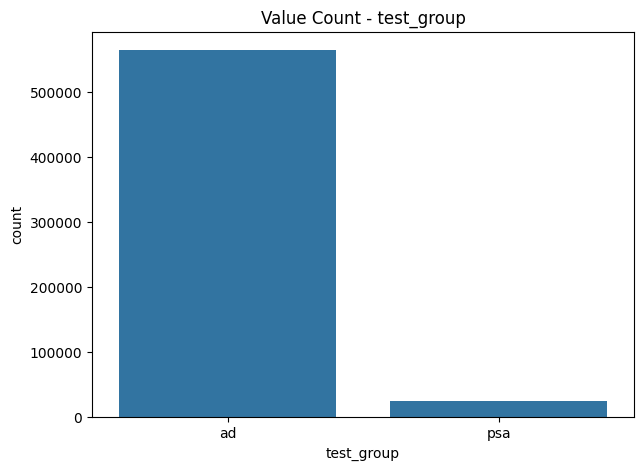

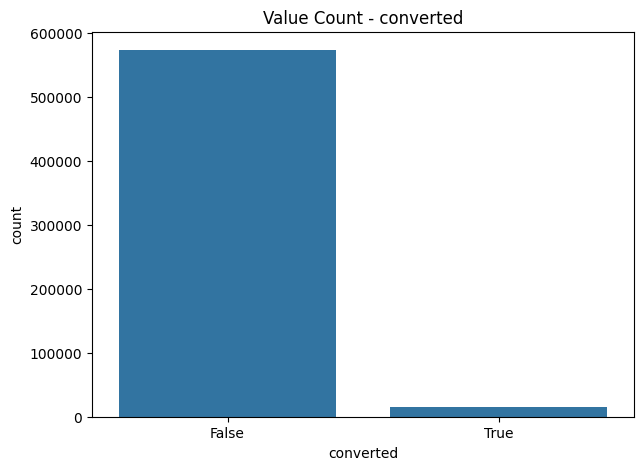

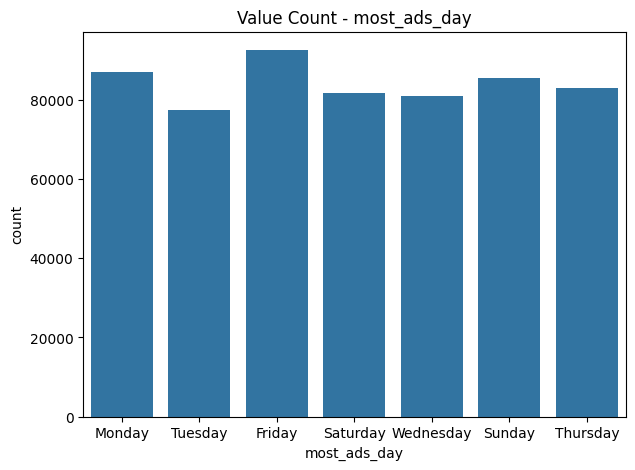

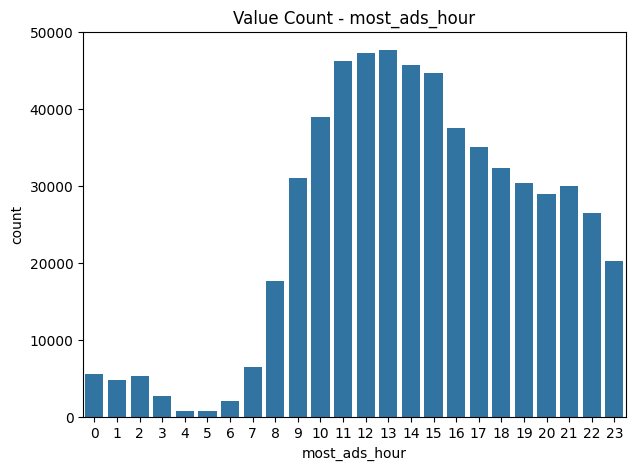

In [20]:
#create columns of interest
col_lst = df.columns[[1,2,4,5]]

#loop through columns of interest
for i in col_lst:
    val_count(i)

- la mayoría de los usuarios vieron los anuncios en comparación con los que vieron la psa

- la mayor cantidad de anuncios vistos por un usuario ocurrieron el viernes y luego el lunes

- entre las 10 a. m. y las 3 p. m., los usuarios vieron la mayor cantidad de anuncios

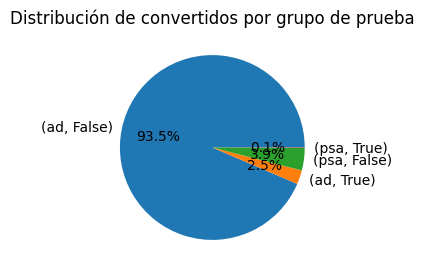

In [21]:
grouped_counts = df.groupby('test_group')['converted'].value_counts()
grouped_counts

# Plot the data as a pie chart
grouped_counts.plot.pie(figsize= (3,3),autopct='%1.1f%%')

# Set the title and axis labels
plt.title('Distribución de convertidos por grupo de prueba')
plt.ylabel('')

# Show the plot
plt.show()


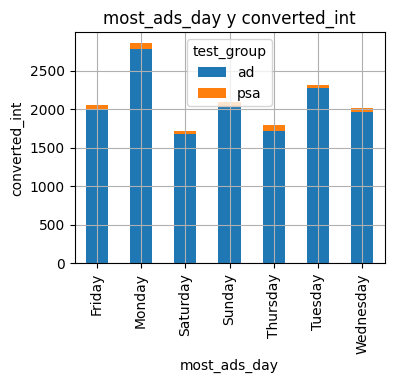

In [22]:
ax =df.groupby(by =['most_ads_day', 'test_group']).sum()['converted_int'].unstack('test_group').plot(kind= 'bar', figsize= (4,3), grid= True, stacked= True)
ax.set_ylabel('converted_int')
ax.set_title('most_ads_day y converted_int')
plt.show()

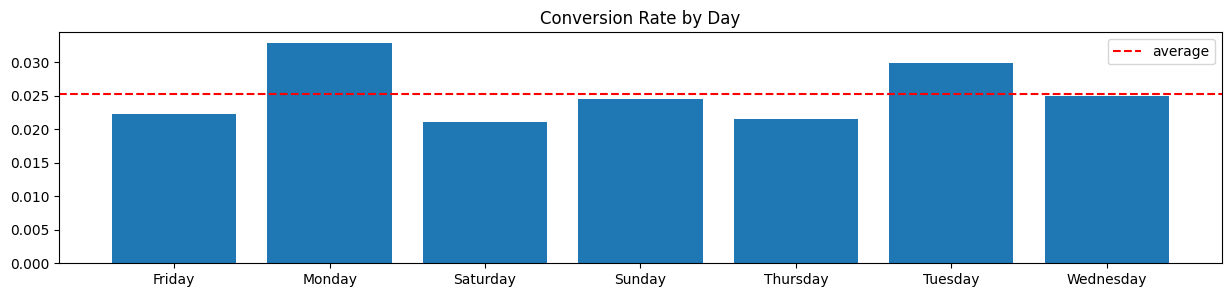

In [23]:
#visualize conversion by day
df_day_conv = pd.DataFrame(df.groupby('most_ads_day')['converted'].mean())
df_day_conv.reset_index(inplace=True)

plt.figure(figsize=(15,3))
plt.bar(data=df_day_conv, x='most_ads_day', height='converted')
plt.title('Conversion Rate by Day')
plt.axhline(df['converted'].mean(), color='r', linestyle='--', label='average')
plt.legend()
plt.show()

# AB test

### Minimum Sample Size

In [24]:
#Pueba de tamaño de muestra para las proporciones
import math
#Calculo del tamaño de la muestra
def sample_size_calculator(population_size, confidence_level, margin_of_error):
    z_score = {
        0.90: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }

    z = z_score[confidence_level]
    p = 0.5 # assuming 50% for a conservative estimate of the sample size
    q = 1 - p

    sample_size = ((z**2) * p * q * population_size) / ((z**2 * q) + ((margin_of_error**2) * (population_size - 1)))
    return math.ceil(sample_size)

In [25]:
#compute sample size
pop_size = df.shape[0]
conf_level = 0.99
margin_err = 0.03

sample_size = sample_size_calculator(pop_size, conf_level, margin_err)
print(f"The population size is :{pop_size} \nThe required sample size is: {sample_size}")

The population size is :588101 
The required sample size is: 1832


In [26]:
#Separar un tipo dato de tratamiento y control

treatment = df.query('test_group == "ad"')
control = df.query('test_group == "psa"')


In [27]:
df.converted.mean() *100

2.523886203220195

In [28]:
control["converted"].mean()


0.01785410644448223

In [29]:
treatment["converted"].mean()

0.025546559636683747

you can see the the mean of converted in treatment group is more than control group
which make the hypothsis of ad has positive effect on conversion

(array([  1.,   0.,   2.,   0.,   5.,   5.,   8.,   5.,  18.,  37.,  25.,
         56.,  63.,  94., 111., 170., 184., 284., 236., 367., 376., 460.,
        507., 537., 605., 579., 648., 599., 539., 500., 521., 449., 383.,
        325., 318., 221., 190., 143., 133.,  99.,  52.,  41.,  36.,  20.,
         14.,  16.,  10.,   4.,   2.,   2.]),
 array([0.02441828, 0.02444931, 0.02448035, 0.02451138, 0.02454241,
        0.02457344, 0.02460447, 0.02463551, 0.02466654, 0.02469757,
        0.0247286 , 0.02475963, 0.02479067, 0.0248217 , 0.02485273,
        0.02488376, 0.02491479, 0.02494583, 0.02497686, 0.02500789,
        0.02503892, 0.02506996, 0.02510099, 0.02513202, 0.02516305,
        0.02519408, 0.02522512, 0.02525615, 0.02528718, 0.02531821,
        0.02534924, 0.02538028, 0.02541131, 0.02544234, 0.02547337,
        0.0255044 , 0.02553544, 0.02556647, 0.0255975 , 0.02562853,
        0.02565956, 0.0256906 , 0.02572163, 0.02575266, 0.02578369,
        0.02581473, 0.02584576, 0.02587679, 0.

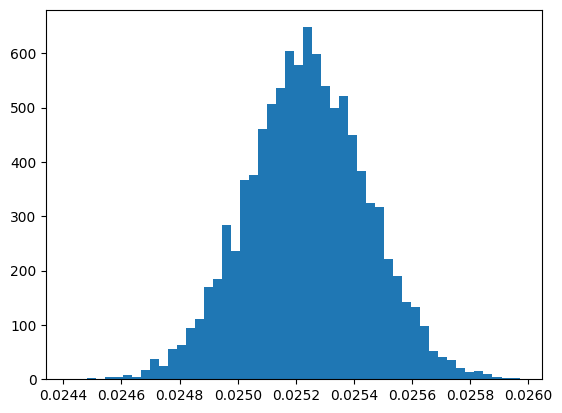

In [30]:
#extraer una muestra de 10000 datos (minimo 1832)
ad_converted = np.random.binomial(len(treatment),
                                  df.converted.mean(), 10000) / len(treatment)

plt.hist(ad_converted, bins=50)

(array([  1.,   2.,   3.,   3.,   9.,  10.,  10.,  22.,  35.,  47.,  73.,
        119., 108., 164., 229., 211., 338., 401., 338., 523., 586., 463.,
        704., 623., 500., 644., 623., 547., 382., 456., 420., 250., 281.,
        234., 153., 141.,  97.,  65.,  68.,  41.,  22.,  22.,  13.,   5.,
          5.,   5.,   1.,   0.,   1.,   2.]),
 array([0.02146744, 0.02162387, 0.02178031, 0.02193675, 0.02209318,
        0.02224962, 0.02240605, 0.02256249, 0.02271893, 0.02287536,
        0.0230318 , 0.02318823, 0.02334467, 0.02350111, 0.02365754,
        0.02381398, 0.02397041, 0.02412685, 0.02428329, 0.02443972,
        0.02459616, 0.02475259, 0.02490903, 0.02506547, 0.0252219 ,
        0.02537834, 0.02553477, 0.02569121, 0.02584764, 0.02600408,
        0.02616052, 0.02631695, 0.02647339, 0.02662982, 0.02678626,
        0.0269427 , 0.02709913, 0.02725557, 0.027412  , 0.02756844,
        0.02772488, 0.02788131, 0.02803775, 0.02819418, 0.02835062,
        0.02850706, 0.02866349, 0.02881993, 0.

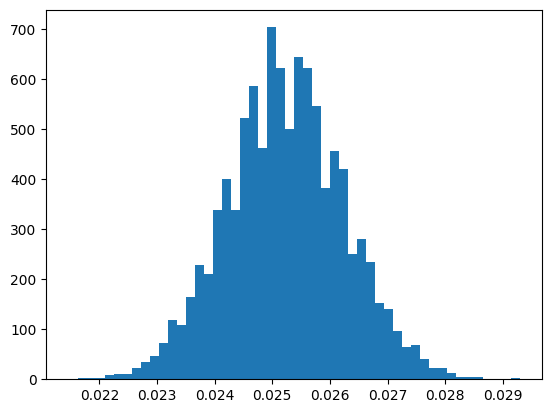

In [31]:
psa_converted = np.random.binomial(len(control),
                                   df.converted.mean(), 10000) / len(control)

plt.hist(psa_converted, bins=50 ,align = 'mid' , data=None)

In [32]:
#Diferenciacion de proporciones
p_diffs = ad_converted - psa_converted
p_diffs
p_diffs.mean()

5.691636829371812e-06

In [33]:
#real diff
# customer who is shown ads bought less
ab_data_diff = treatment['converted'].mean() - control['converted'].mean()
ab_data_diff

0.007692453192201517

- ¿Mostrar anuncios a las personas genera más compras? ¿Es esto estadísticamente significativo o no?
- Hipótesis nula (H0): Mostrar anuncios no tiene un efecto significativo en el número de compras.
- Hipótesis alternativa (H1): Mostrar anuncios tiene un efecto significativo en el número de compras.

In [35]:
# is buying less is
if ab_data_diff > 0 :
    p_value = (p_diffs > ab_data_diff).mean() * 100
else :
    p_value = (p_diffs <= ab_data_diff).mean() * 100
print ( "p_value = " ,p_value)
if p_value < 0.05:
    print( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print( 'No rechazar la hipótesis nula. No hay diferencia significativa entre los dos grupos.')


p_value =  0.0
Reject the null hypothesis. There is a significant difference between the two groups.


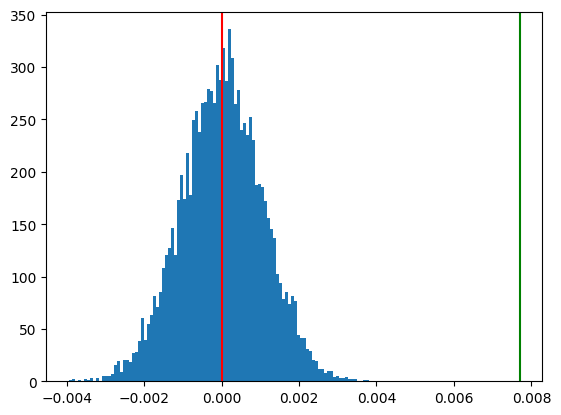

In [36]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')

# AB test using Code Simulation

In [37]:
treatment = df.query('test_group == "ad"')
control = df.query('test_group == "psa"')


In [38]:
dif = treatment["converted"].mean() - control["converted"].mean()
dif

0.007692453192201517

In [39]:
conversion = np.array([
    np.append(np.zeros(len(control["converted"])), np.ones(len(treatment["converted"]))),
    np.append(control["converted"],treatment["converted"])
])
conversion_t = conversion.T
conversion_t

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [40]:
def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(conversion_t))
        experiment_data = np.array([
            experiment_label,
            conversion_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean


In [42]:
n=200
p_difs = sh_exp(n)

if dif > 0  :
    p_value = len(p_difs[p_difs >= dif]) / n * 100
else :
    p_value = len(p_difs[p_difs <= dif]) / n * 100

if p_value < 0.05:
    print( 'Rechace la hipótesis nula. Hay una diferencia significativa entre los dos grupos.')
else:
    print( 'No rechazar la hipótesis nula. No hay diferencia significativa entre los dos grupos.')

Rechace la hipótesis nula. Hay una diferencia significativa entre los dos grupos.


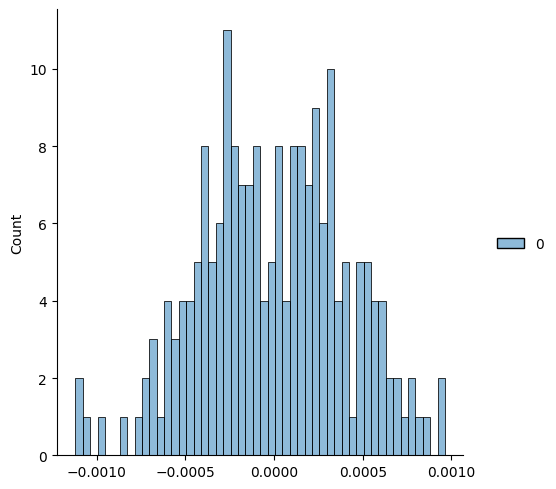

In [43]:
sns.displot(p_difs, bins=50)

# T-test

#### comprobar distribución de dos grupos por KDE

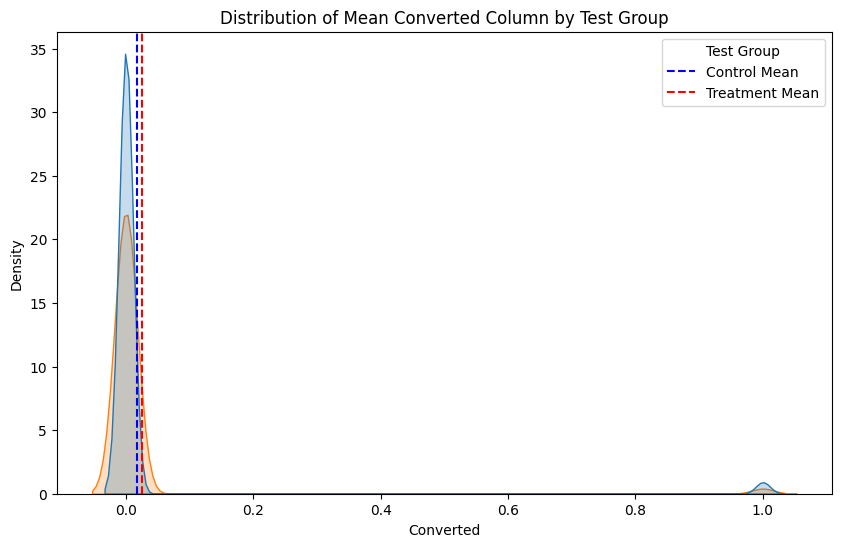

In [44]:
control_mean = df.loc[df['test_group'] == 'psa', 'converted'].mean()
treatment_mean = df.loc[df['test_group'] == 'ad', 'converted'].mean()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='converted', hue='test_group', fill=True, common_norm=False)
plt.axvline(control_mean, color='b', linestyle='--', label='Control Mean')
plt.axvline(treatment_mean, color='r', linestyle='--', label='Treatment Mean')
plt.title('Distribution of Mean Converted Column by Test Group')
plt.xlabel('Converted')
plt.ylabel('Density')
plt.legend(title='Test Group')
plt.show()


##### verificar la distribución de cada grupo usando bootstrap

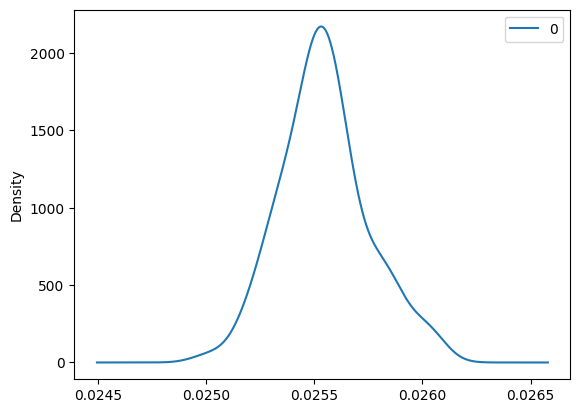

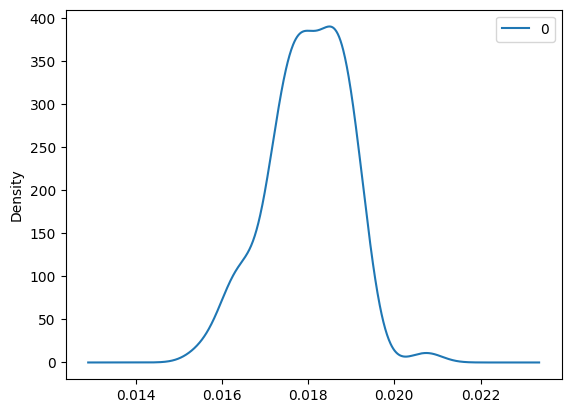

In [45]:
boot_treatment=[]
for i in range(100):
    boot_mean = treatment.sample(frac=1, replace=True)['converted'].mean()
    boot_treatment.append(boot_mean)
boot_treatment=pd.DataFrame(boot_treatment)
boot_treatment.plot(kind='density');

boot_control=[]

for i in range(100):
    boot_mean=control.sample(frac=1,replace=True)['converted'].mean()
    boot_control.append(boot_mean)

boot_control=pd.DataFrame(boot_control)
boot_control.plot(kind='density');


In [46]:
def t_test(treatment_data, control_data) :

    t_statistic, p_value = stats.ttest_ind(treatment_data, control_data)
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    if p_value < 0.05 :
        print( 'echace la hipótesis nula. Hay una diferencia significativa entre los dos grupos.')
    else:
        print( 'No se pudo rechazar la hipótesis nula. No hay diferencia significativa entre los dos grupos.')

    return t_statistic, p_value


# Perform a t-test to compare the means of the two groups
t_statistic, p_value = t_test(treatment["converted"], control["converted"])



T-statistic: 7.37040597428566
P-value: 1.7033052627831264e-13
echace la hipótesis nula. Hay una diferencia significativa entre los dos grupos.
